In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [24]:
ratings_df=pd.read_csv('ratings.csv')
tags_df=pd.read_csv('tags.csv')

In [22]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


Data preprocessing involved sorting the two csv files based on the column that they had in common. Next, I dropped several columns that were not necessary and added the 'tag' column to the 'ratings' dataframe. Finally, I filled the null cells with '0'.

In [42]:
tags_df.sort_values('movieId')

,userId,movieId,tag,timestamp
992354,145701,1,animation,1209562100
367761,30610,1,Disney,1528125604
24936,5054,1,computer animation,1433533200
24937,5054,1,good cartoon chindren,1433533217
24938,5054,1,pixar,1433533206
...,...,...,...,...
728958,96399,209063,friends schools,1574021200
728959,96399,209063,independent school,1574021163
728960,96399,209063,Philadelphia,1574021180
728963,96399,209063,racism,1574021194


In [43]:
tag_df=tags_df.drop(['userId','movieId','timestamp'], axis=1)

In [45]:
tag_df.head()

,tag
0,classic
1,sci-fi
2,dark comedy
3,great dialogue
4,so bad it's good


In [3]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [44]:
ratings_df.sort_values('movieId')

,userId,movieId,rating,timestamp
2001185,13334,1,5.0,832023973
10627899,69000,1,4.0,1564248795
4075778,26803,1,3.5,1106468113
19245863,124893,1,3.5,1173048946
21816622,141835,1,3.5,1558539488
...,...,...,...,...
18457961,119571,209157,1.5,1574280748
17864443,115835,209159,3.0,1574280985
1036618,6964,209163,4.5,1574284913
18457962,119571,209169,3.0,1574291826


In [49]:
ratings_df['tag']=tag_df

In [50]:
ratings_df.head()

,userId,movieId,rating,timestamp,tag
0,1,296,5.0,1147880044,classic
1,1,306,3.5,1147868817,sci-fi
2,1,307,5.0,1147868828,dark comedy
3,1,665,5.0,1147878820,great dialogue
4,1,899,3.5,1147868510,so bad it's good


In [51]:
ratings_df.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
tag           True
dtype: bool

In [52]:
ratings_df.fillna(0, inplace=True)

In [53]:
ratings_df.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
tag          False
dtype: bool

I randomized the dataframe and selected the first 100,000 rows to make the model building more managable. 

In [54]:
ratings=ratings_df.sample(frac=1)

In [55]:
ratings_sub=ratings.head(100000)

In [56]:
X=ratings_sub[['userId','movieId','rating']]
#X=ratings[['userId','movieId','rating']]
X=X.to_numpy()

Used the elbow method to find the best number of clusters

In [57]:
elbow=[]
for a in range(1,10):
    kmeans=KMeans(n_clusters=a, init='k-means++', max_iter=300, n_init=9,random_state=0)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

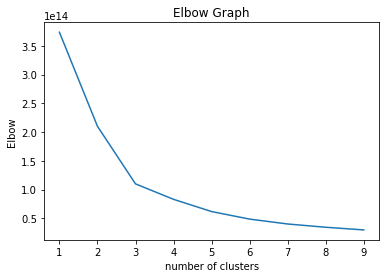

In [58]:
plt.plot(range(1,10),elbow)
plt.title('Elbow Graph')
plt.xlabel('number of clusters')
plt.ylabel('Elbow')
plt.show()

KMeans model was trained with 3 clusters, as found by the elbow method. 

In [59]:
kmeans_final=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=1)
y=kmeans_final.fit_predict(X)

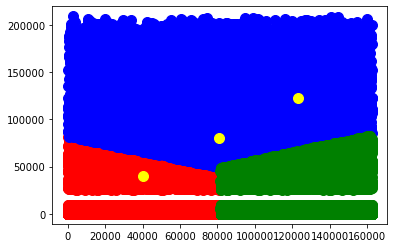

In [60]:
plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label='cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label='cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label='cluster 3')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 0], s=100, c='yellow', label='centroids')


After trying a simple KMeans model, I attempted a DBCSAN clustering algorithm

In [61]:
X=StandardScaler().fit_transform(X)
db=DBSCAN(eps=0.4, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels=db.labels_

In [62]:
n_clusters_=len(set(labels)) - (1 if -1 in labels else 0)
n_noise_=list(labels).count(-1)

In [63]:
print('estimated number of clusters: %d' % n_clusters_)
print('estimated number of noise points: %d' % n_noise_)
print('homogeneity: %0.3f' % metrics.homogeneity_score(labels_true, labels))
print('completeness: %0.3f' % metrics.completeness_score(labels_true, labels))
print('V-measure: %0.3f' % metrics.v_measure_score(lables_true, labels))
print('adjusted rand index: %0.3f' % metrics.adjusted_rand_score(labels_true, labels))
print('adjusted mutual information: %0.3f' %  metrics.adjusted_mutual_info_score(labels_true, lables))
print('silhouette coefficient: %0.3f' % metrics.silhouette_score(X, labels))

estimated number of clusters: 22
estimated number of noise points: 138


NameError: name 'labels_true' is not defined

I do not know why I am getting this error because I have a truth statement three cells above (see the following lines in that cell)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True

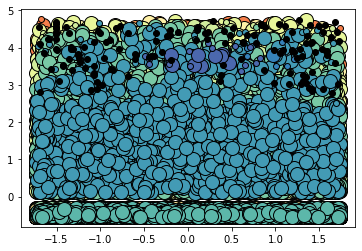

In [64]:
unique_labels=set(labels)
colors=[plt.cm.Spectral(each)
       for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k==-1:
        col=[0,0,0,1]
        
    class_member_mask=(labels==k)
    
    xy=X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:,1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14)
    
    xy=X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)
    
plt.show()